# Fastpages Notebook Blog Post
> A tutorial of fastpages for Jupyter notebooks.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [528]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

# COL1 = 2020 USA's daily Cases
# COL21 =month;     COL22 = top10 countries
# COL3 = 2020 USA's death

In [529]:
df=pd.read_csv('covid.csv')
df.head(5)

,Date.Day,Date.Month,Date.Year,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,0,0,Afghanistan,AFG,38041757,Asia,0.0
1,31,12,2019,0,0,Algeria,DZA,43053054,Africa,0.0
2,31,12,2019,0,0,Armenia,ARM,2957728,Europe,0.0
3,31,12,2019,0,0,Australia,AUS,25203200,Oceania,0.0
4,31,12,2019,0,0,Austria,AUT,8858775,Europe,0.0


I combine Date.Day, Date.Month, Date.Year into new column **Date (ex: 2019/12/31)**

In [530]:
df1 = df.copy()  
df['Date.Year']= df1['Date.Year'].astype(str)  
df['Date.Month']= df1['Date.Month'].astype(str)  
df['Date.Day']= df1['Date.Day'].astype(str)  
df.insert(3, column="Date", value=(df['Date.Year']+'/'+df['Date.Month']+'/'+df['Date.Day']))
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


In [531]:
df

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
0,31,12,2019,2019/12/31,0,0,Afghanistan,AFG,38041757,Asia,0.000000
1,31,12,2019,2019/12/31,0,0,Algeria,DZA,43053054,Africa,0.000000
2,31,12,2019,2019/12/31,0,0,Armenia,ARM,2957728,Europe,0.000000
3,31,12,2019,2019/12/31,0,0,Australia,AUS,25203200,Oceania,0.000000
4,31,12,2019,2019/12/31,0,0,Austria,AUT,8858775,Europe,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
53624,10,12,2020,2020/12/10,202,16,Afghanistan,AFG,38041757,Asia,6.968658
53625,11,12,2020,2020/12/11,63,10,Afghanistan,AFG,38041757,Asia,7.134266
53626,12,12,2020,2020/12/12,113,11,Afghanistan,AFG,38041757,Asia,6.868768
53627,13,12,2020,2020/12/13,298,9,Afghanistan,AFG,38041757,Asia,7.052776


# I choose only **USA(df3)** to do analysis

In [532]:
df3=df.loc[df['Location.Country']=='United_States_of_America']
df3

,Date.Day,Date.Month,Date.Year,Date,Data.Cases,Data.Deaths,Location.Country,Location.Code,Data.Population,Location.Continent,Data.Rate
65,31,12,2019,2019/12/31,0,0,United_States_of_America,USA,329064917,America,0.000000
132,1,1,2020,2020/1/1,0,0,United_States_of_America,USA,329064917,America,0.000000
199,2,1,2020,2020/1/2,0,0,United_States_of_America,USA,329064917,America,0.000000
266,3,1,2020,2020/1/3,0,0,United_States_of_America,USA,329064917,America,0.000000
333,4,1,2020,2020/1/4,0,0,United_States_of_America,USA,329064917,America,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
52732,1,11,2020,2020/11/1,78934,848,United_States_of_America,USA,329064917,America,309.850412
52944,2,11,2020,2020/11/2,81001,440,United_States_of_America,USA,329064917,America,319.926843
53156,3,11,2020,2020/11/3,83883,555,United_States_of_America,USA,329064917,America,327.136059
53368,4,11,2020,2020/11/4,92734,1076,United_States_of_America,USA,329064917,America,337.524586


It's my first time to complet **my Date column**, so I decide to draw my own picture!!!!

Text(0.5, 1.0, '2021 USA daily patients curve')

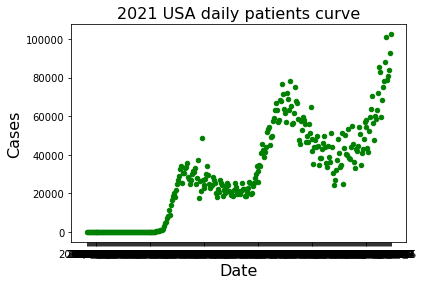

In [533]:
date=df3.plot.scatter(x='Date', y='Data.Cases',color='green')
date.set_xlabel('Date',fontsize=16)
date.set_ylabel('Cases',fontsize=16)
date.set_title('2021 USA daily patients curve',fontsize=16)